In [1]:
#loading dataset
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns
# data preprocessing
from sklearn.preprocessing import StandardScaler

# data splitting
from sklearn.model_selection import train_test_split

# data modeling
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

# All Model`s
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import  AdaBoostClassifier
from sklearn.ensemble import  GradientBoostingClassifier

In [2]:
Data = pd.read_csv(r"C:\Users\Md.Shakhawat Kabir\Desktop\Full_feature_data8sec.csv")
Data

,0,1,2,3,4,5,6,7,8,9,...,222,223,224,225,226,227,228,229,230,231
0,0.237731,0.271438,0.231115,0.205129,0.327846,0.298531,0.155484,0.231727,0.258646,0.391060,...,0.958898,0.916750,0.908312,0.691119,0.835005,0.876676,0.913564,0.998378,0.802795,0.0
1,0.525592,0.472005,0.559939,0.545135,0.515483,0.434181,0.408683,0.525175,0.517135,0.577948,...,1.069202,0.927021,0.829646,0.796822,0.812203,0.905807,0.838565,0.966738,0.560600,0.0
2,0.362238,0.453657,0.367739,0.569930,0.386825,0.446326,0.533002,0.406928,0.497937,0.409507,...,0.921123,0.896250,0.894655,0.996300,0.986507,1.018279,0.934882,0.774752,0.506077,0.0
3,0.426183,0.443488,0.503179,0.446013,0.308886,0.478375,0.502533,0.460015,0.477389,0.515927,...,1.004485,0.893069,0.775634,0.976204,0.856234,0.889472,0.878188,0.711451,0.497412,0.0
4,0.443872,0.547165,0.449588,0.596705,0.471281,0.568231,0.481293,0.445354,0.469777,0.465266,...,0.722205,0.789209,0.753635,0.792819,0.815069,0.695286,0.873937,0.763576,0.521764,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47871,0.517827,0.569006,0.498979,0.476836,0.569441,0.439424,0.564618,0.598256,0.473253,0.501800,...,1.039616,1.063122,1.129749,1.049808,1.010132,1.103496,0.966013,0.775144,0.381793,0.0
47872,0.550222,0.532460,0.568019,0.599673,0.431463,0.509925,0.600544,0.381907,0.539138,0.447469,...,1.094155,1.118183,0.961279,1.029952,1.010014,1.094238,1.025693,0.895212,0.457229,0.0
47873,0.429925,0.529781,0.431279,0.478944,0.519904,0.506410,0.524140,0.519448,0.437079,0.460148,...,0.952002,1.028193,0.997588,1.088019,0.926116,0.970077,0.991673,0.938932,0.537083,0.0
47874,0.486987,0.470565,0.479240,0.461068,0.475725,0.455243,0.461272,0.483860,0.451289,0.477916,...,0.159339,0.179733,0.174451,0.158623,0.135969,0.183733,0.176790,0.140877,0.134715,0.0


## **Model Prepration**

# Brack Dataset

In [3]:
from sklearn.model_selection import train_test_split

X=Data.iloc[:,:-1].values
y=Data.iloc[:,-1].values

# Test and Train Dataset

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [5]:
print('Train set shape is',format(X_train.shape))
print('Test set shape is',format(X_test.shape))

Train set shape is (33513, 231)
Test set shape is (14363, 231)


In [6]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

## 1. Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(n_jobs=20,)
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 90.17%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.910747     0.709914   0.90174      0.810330      0.887231
recall         0.985265     0.271916   0.90174      0.628591      0.901740
f1-score       0.946541     0.393219   0.90174      0.669880      0.881753
support    29589.000000  3924.000000   0.90174  33513.000000  33513.000000
_______________________________________________
Confusion Matrix: 
 [[29153   436]
 [ 2857  1067]]

Test Result:
Accuracy Score: 89.95%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.907943     0.724812  0.899464      0.816377      0.885719
recall         0.985499     0.276535  0.899464      0.631017      0.899464
f1-score       0.945133     0.400332  0.899464      0.672732      0.879019
support   

# Confusion Matrix

Confusion Matrix for Training

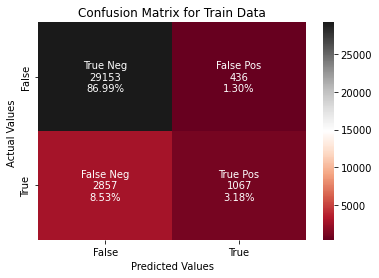

In [8]:
y_pred = lr_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

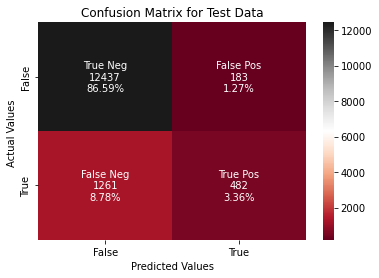

In [9]:
y_pred = lr_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Roc Curve 

Roc Curve for Training

In [10]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = lr_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_lr_clf,true_positive_rate_lr_clf,threshold_lr_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.856952412509415

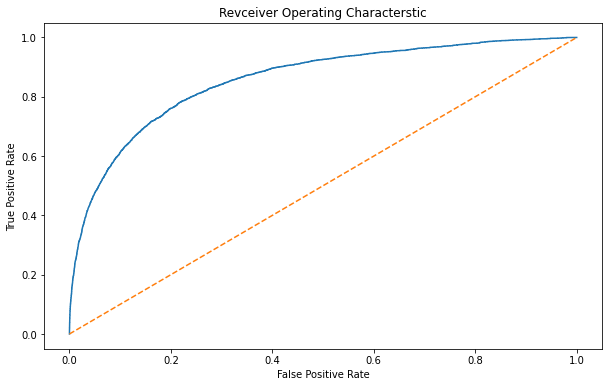

In [11]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_lr_clf,true_positive_rate_lr_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [12]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = lr_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_lr_clf,true_positive_rate_lr_clf,threshold_lr_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.8439153944280632

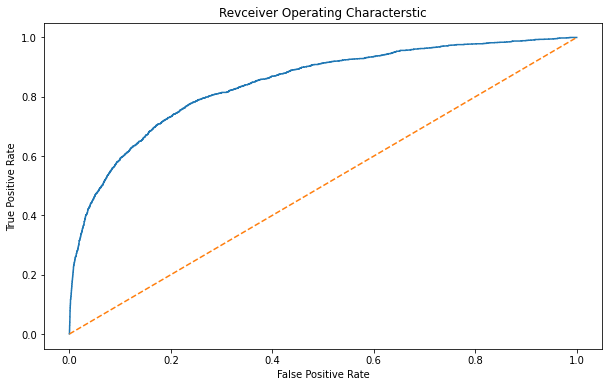

In [13]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_lr_clf,true_positive_rate_lr_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [14]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["LogisticRegression", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression,90.173962,89.94639


## 2. K-nearest neighbors

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=40, leaf_size=30)
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 90.92%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.909007     0.916038  0.909229      0.912522      0.909830
recall         0.996992     0.247452  0.909229      0.622222      0.909229
f1-score       0.950969     0.389647  0.909229      0.670308      0.885244
support    29589.000000  3924.000000  0.909229  33513.000000  33513.000000
_______________________________________________
Confusion Matrix: 
 [[29500    89]
 [ 2953   971]]

Test Result:
Accuracy Score: 90.55%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.904068     0.953052  0.905521      0.928560      0.910013
recall         0.998415     0.232932  0.905521      0.615673      0.905521
f1-score       0.948902     0.374366  0.905521      0.661634      0.879180
support   

# Confusion Matrix

Confusion Matrix for Training

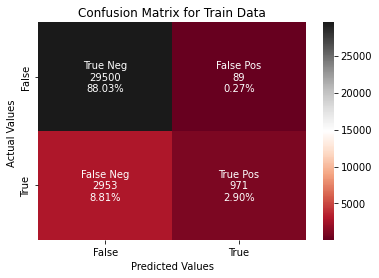

In [16]:
y_pred = knn_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

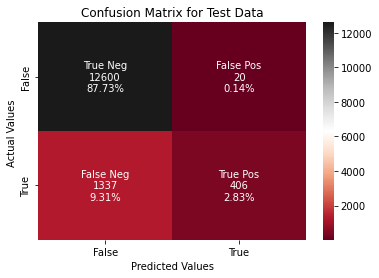

In [17]:
y_pred = knn_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Roc Curve 

Roc Curve for Training

In [18]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = knn_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_knn_clf,true_positive_rate_knn_clf,threshold_knn_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.9206712318946255

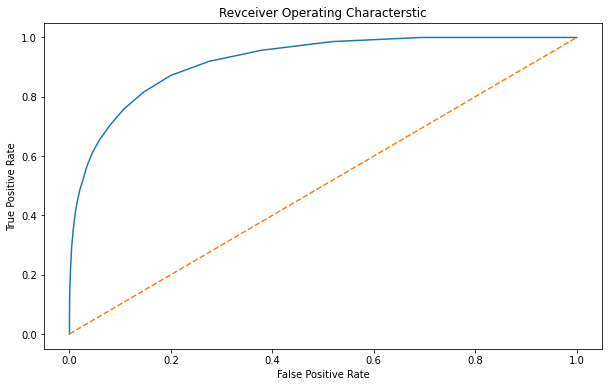

In [19]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_knn_clf,true_positive_rate_knn_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [20]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = knn_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_knn_clf,true_positive_rate_knn_clf,threshold_knn_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.8897725609251586

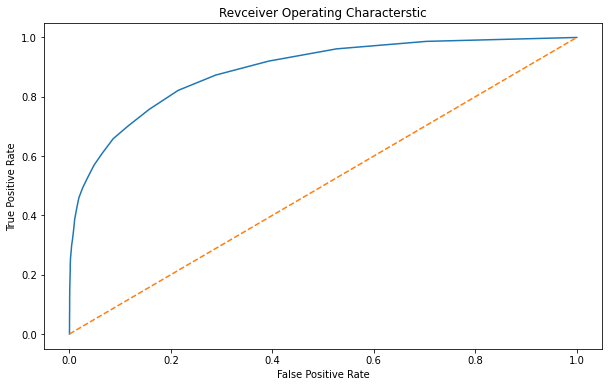

In [21]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_knn_clf,true_positive_rate_knn_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

k-NN: Varying Number of Neighbors

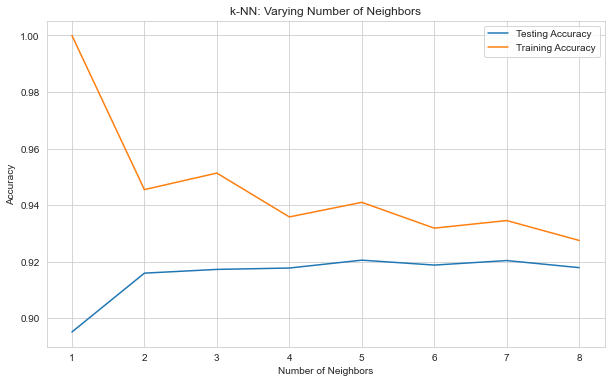

In [22]:
from sklearn.neighbors import KNeighborsClassifier
no_neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    # We instantiate the classifier
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn_clf.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn_clf.score(X_train, y_train)

    # Compute accuracy on the testing set
    test_accuracy[i] = knn_clf.score(X_test, y_test)

# Visualization of k values vs accuracy
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [23]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression,90.173962,89.946390
1,K-nearest neighbors,92.746099,91.784446


## 3. Support Vector machine

In [24]:
from sklearn.svm import SVC

svm_clf = SVC(probability=True, C=5,)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 91.59%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.914165     0.962343  0.915883      0.938254      0.919807
recall         0.998479     0.293068  0.915883      0.645774      0.915883
f1-score       0.954464     0.449307  0.915883      0.701885      0.895316
support    29589.000000  3924.000000  0.915883  33513.000000  33513.000000
_______________________________________________
Confusion Matrix: 
 [[29544    45]
 [ 2774  1150]]

Test Result:
Accuracy Score: 90.94%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.907951     0.951020   0.90942      0.929486      0.913177
recall         0.998098     0.267355   0.90942      0.632727      0.909420
f1-score       0.950893     0.417376   0.90942      0.684134      0.886149
support   

# Confusion Matrix

Confusion Matrix for Training 

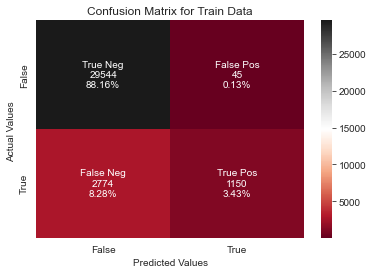

In [25]:
y_pred = svm_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

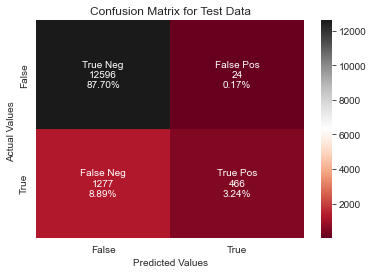

In [26]:
y_pred = svm_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Roc Curve

Roc Curve for Training

In [27]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = svm_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_svm_clf,true_positive_rate_svm_clf,threshold_svm_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.913791393673345

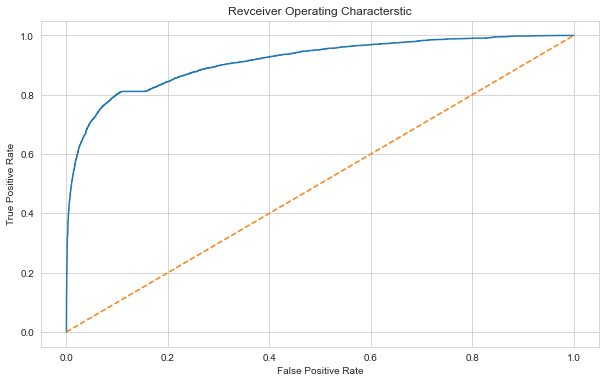

In [28]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_svm_clf,true_positive_rate_svm_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [29]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = svm_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_svm_clf,true_positive_rate_svm_clf,threshold_svm_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.888093487829516

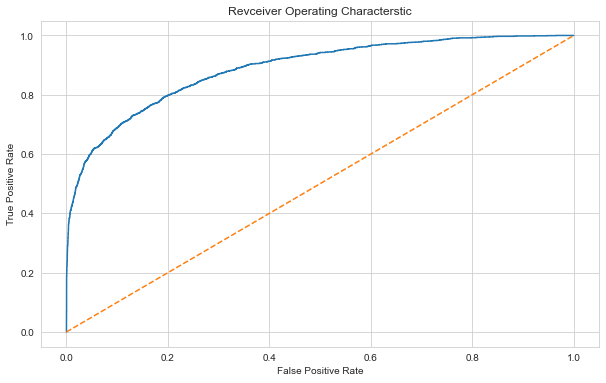

In [30]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_svm_clf,true_positive_rate_svm_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [31]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression,90.173962,89.946390
1,K-nearest neighbors,92.746099,91.784446
2,Support Vector Machine,91.588339,90.942004


# 4. LGBMClassifier

In [32]:
from lightgbm import LGBMClassifier
lgbmc_clf = LGBMClassifier(int = 10,) 
lgbmc_clf.fit(X_train, y_train)

print_score(lgbmc_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lgbmc_clf, X_train, y_train, X_test, y_test, train=False)

[LightGBM] [Warning] Unknown parameter: int
Train Result:
Accuracy Score: 96.95%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.969619     0.968054  0.969475      0.968837      0.969436
recall         0.996654     0.764526  0.969475      0.880590      0.969475
f1-score       0.982951     0.854336  0.969475      0.918643      0.967891
support    29589.000000  3924.000000  0.969475  33513.000000  33513.000000
_______________________________________________
Confusion Matrix: 
 [[29490    99]
 [  924  3000]]

Test Result:
Accuracy Score: 93.89%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.943567     0.884547   0.93894      0.914057      0.936405
recall         0.989699     0.571429   0.93894      0.780564      0.938940
f1-score       0.966083     0.694319   0.

# Confusion Matrix

Confusion Matrix for Training

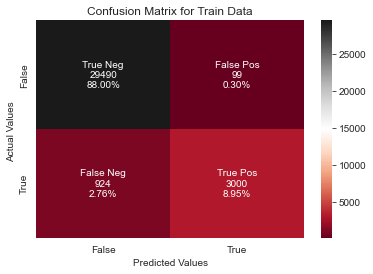

In [33]:
y_pred = lgbmc_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

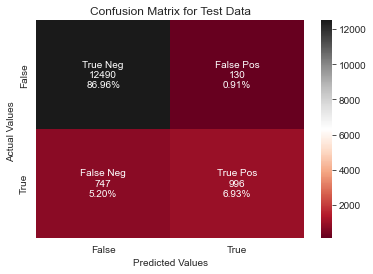

In [34]:
y_pred = lgbmc_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Roc Curve

Roc Curve for Training

In [35]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = lgbmc_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_lgbmc_clf,true_positive_rate_lgbmc_clf,threshold_lgbmc_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.9944250416916307

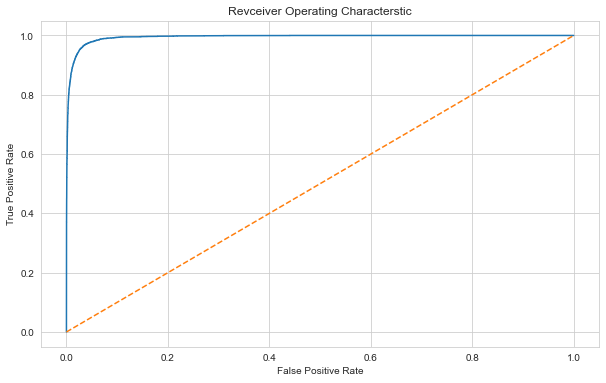

In [36]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_lgbmc_clf,true_positive_rate_lgbmc_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [37]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = lgbmc_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_lgbmc_clf,true_positive_rate_lgbmc_clf,threshold_lgbmc_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.9539360975711767

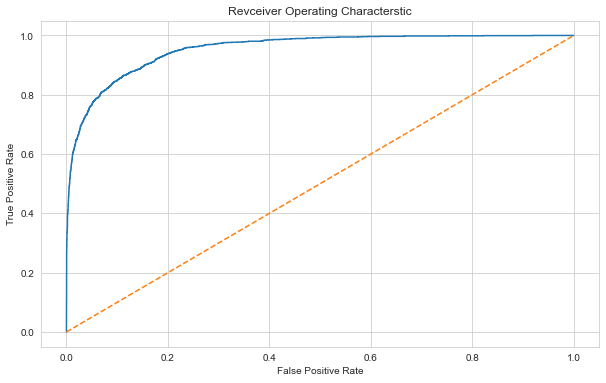

In [38]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_lgbmc_clf,true_positive_rate_lgbmc_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [39]:
test_score = accuracy_score(y_test, lgbmc_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lgbmc_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["LGBMClassifier", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression,90.173962,89.946390
1,K-nearest neighbors,92.746099,91.784446
2,Support Vector Machine,91.588339,90.942004
3,LGBMClassifier,96.947453,93.894033


## 5. Decision Tree Classifier 

In [40]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=100,)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 90.71%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.919428     0.707842  0.907111      0.813635      0.894654
recall         0.980736     0.351937  0.907111      0.666336      0.907111
f1-score       0.949093     0.470128  0.907111      0.709610      0.893012
support    29589.000000  3924.000000  0.907111  33513.000000  33513.000000
_______________________________________________
Confusion Matrix: 
 [[29019   570]
 [ 2543  1381]]

Test Result:
Accuracy Score: 89.74%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.911116     0.667494  0.897445      0.789305      0.881552
recall         0.978764     0.308663  0.897445      0.643714      0.897445
f1-score       0.943729     0.422126  0.897445      0.682928      0.880431
support   

# Confusion Matrix

Confusion Matrix for Training 

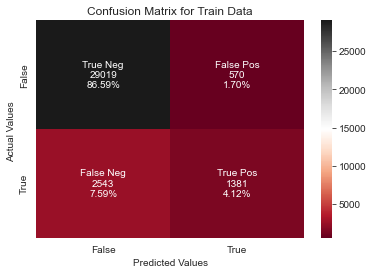

In [41]:
y_pred = tree_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

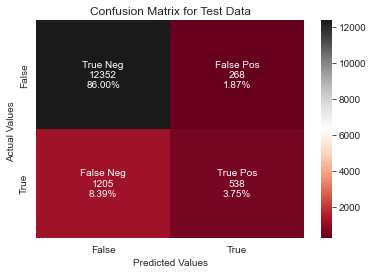

In [42]:
y_pred = tree_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Roc Curve

Roc Curve for Training

In [43]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = tree_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_tree_clf,true_positive_rate_tree_clf,threshold_tree_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.9117305531241826

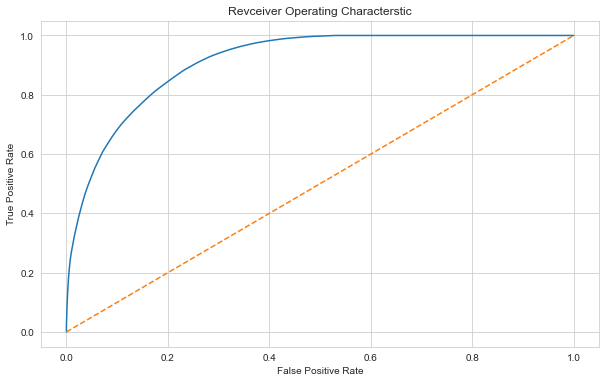

In [44]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_tree_clf,true_positive_rate_tree_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [45]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = tree_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_tree_clf,true_positive_rate_tree_clf,threshold_tree_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.8516073803932052

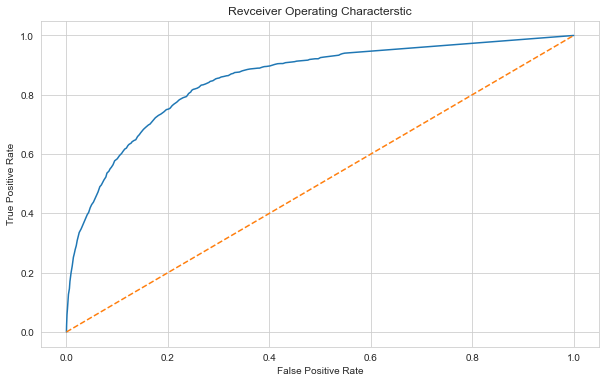

In [46]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_tree_clf,true_positive_rate_tree_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [47]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression,90.173962,89.946390
1,K-nearest neighbors,92.746099,91.784446
2,Support Vector Machine,91.588339,90.942004
3,LGBMClassifier,96.947453,93.894033
4,Decision Tree Classifier,90.711067,89.744482


## 6. Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(min_samples_split=10, min_samples_leaf=100,)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 89.20%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.891118     0.990385  0.892042      0.940751      0.902741
recall         0.999899     0.078746  0.892042      0.539322      0.892042
f1-score       0.942379     0.145892  0.892042      0.544136      0.849120
support    29589.000000  3924.000000  0.892042  33513.000000  33513.000000
_______________________________________________
Confusion Matrix: 
 [[29586     3]
 [ 3615   309]]

Test Result:
Accuracy Score: 88.62%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.885528     0.973913  0.886235      0.929720      0.896254
recall         0.999762     0.064257  0.886235      0.532010      0.886235
f1-score       0.939184     0.120560  0.886235      0.529872      0.839841
support   

# Confusion Matrix

Confusion Matrix for Training

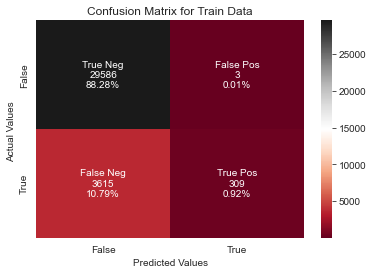

In [49]:
y_pred = rf_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

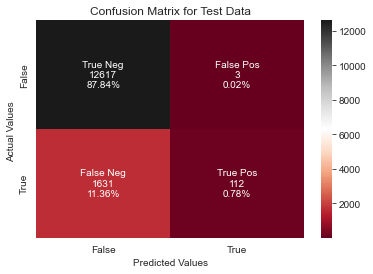

In [50]:
y_pred = rf_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Roc Curve

Roc Curve for Training

In [51]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = rf_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_rf_clf,true_positive_rate_rf_clf,threshold_rf_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.9391670128121904

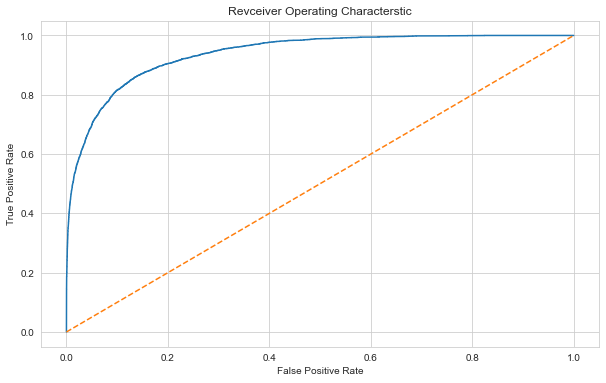

In [52]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_rf_clf,true_positive_rate_rf_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [53]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = rf_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_rf_clf,true_positive_rate_rf_clf,threshold_rf_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.9023616767272848

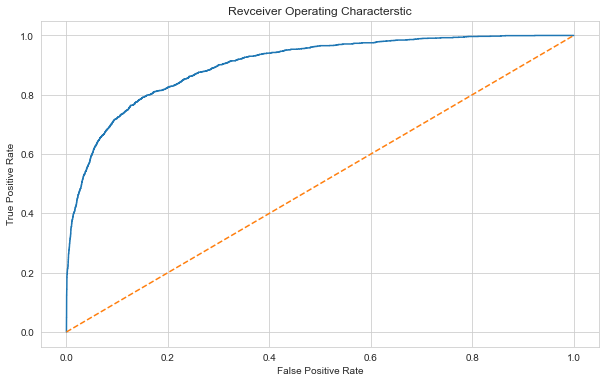

In [54]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_rf_clf,true_positive_rate_rf_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [55]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression,90.173962,89.946390
1,K-nearest neighbors,92.746099,91.784446
2,Support Vector Machine,91.588339,90.942004
3,LGBMClassifier,96.947453,93.894033
4,Decision Tree Classifier,90.711067,89.744482
5,Random Forest Classifier,89.204189,88.623547


## 7. XGBoost Classifer

In [56]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

C:\Users\Md.Shakhawat Kabir\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:35:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Result:
Accuracy Score: 99.89%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.998953     0.998717  0.998926      0.998835      0.998926
recall         0.999831     0.992100  0.998926      0.995965      0.998926
f1-score       0.999392     0.995398  0.998926      0.997395      0.998924
support    29589.000000  3924.000000  0.998926  33513.000000  33513.000000
_______________________________________________
Confusion Matrix: 
 [[29584     5]
 [   31  3893]]

Test Result:
Accuracy Score: 93.96%
_______________________________________________
CLASSIFICATION REPORT:


# Confusion Matrix

Confusion Matrix for Training

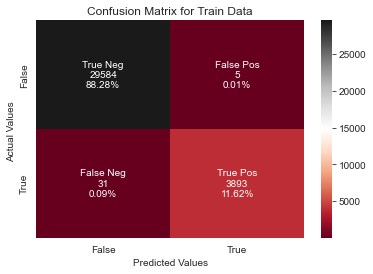

In [57]:
y_pred = xgb_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

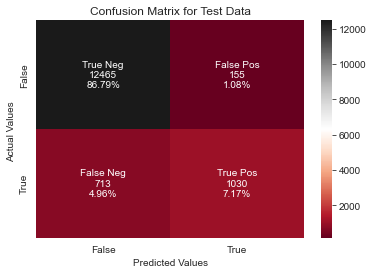

In [58]:
y_pred = xgb_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Roc Curve

Roc Curve for Training

In [59]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = xgb_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_xgb_clf,true_positive_rate_xgb_clf,threshold_xgb_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.9999882091758691

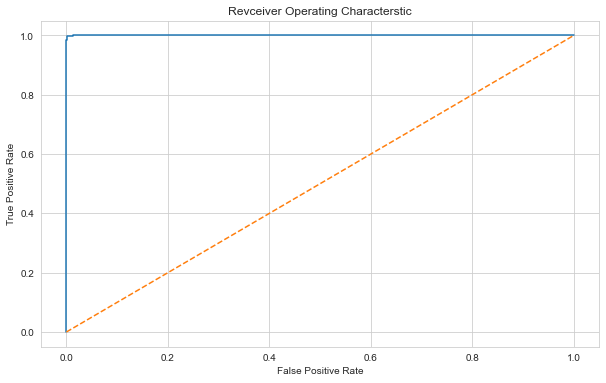

In [60]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_xgb_clf,true_positive_rate_xgb_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [61]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = xgb_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_xgb_clf,true_positive_rate_xgb_clf,threshold_xgb_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.9573165198716533

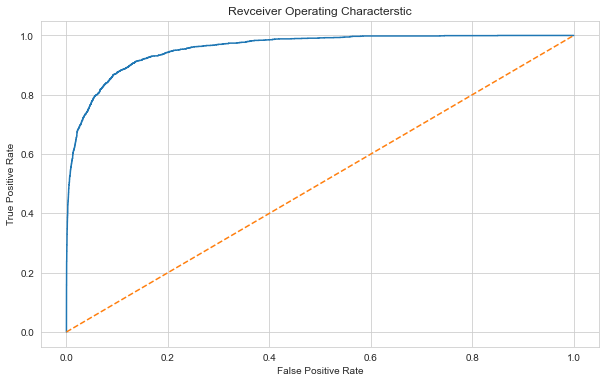

In [62]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_xgb_clf,true_positive_rate_xgb_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [63]:
test_score = accuracy_score(y_test, xgb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, xgb_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["XGBoost Classifier", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression,90.173962,89.946390
1,K-nearest neighbors,92.746099,91.784446
2,Support Vector Machine,91.588339,90.942004
3,LGBMClassifier,96.947453,93.894033
4,Decision Tree Classifier,90.711067,89.744482
5,Random Forest Classifier,89.204189,88.623547
6,XGBoost Classifier,99.892579,93.956694


# 8. AdaBoostClassifier

In [64]:
from sklearn.ensemble import AdaBoostClassifier
ab_clf = AdaBoostClassifier(n_estimators=20,)
ab_clf.fit(X_train, y_train)

print_score(ab_clf, X_train, y_train, X_test, y_test, train=True)
print_score(ab_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 89.45%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.906964     0.628989  0.894489      0.767977      0.874416
recall         0.981142     0.241081  0.894489      0.611111      0.894489
f1-score       0.942596     0.348563  0.894489      0.645579      0.873041
support    29589.000000  3924.000000  0.894489  33513.000000  33513.000000
_______________________________________________
Confusion Matrix: 
 [[29031   558]
 [ 2978   946]]

Test Result:
Accuracy Score: 88.82%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.900334     0.612850  0.888185      0.756592      0.865447
recall         0.981379     0.213425  0.888185      0.597402      0.888185
f1-score       0.939111     0.316596  0.888185      0.627854      0.863567
support   

# Confusion Matrix

Confusion Matrix for Training

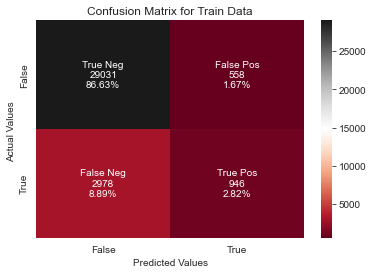

In [65]:
y_pred = ab_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

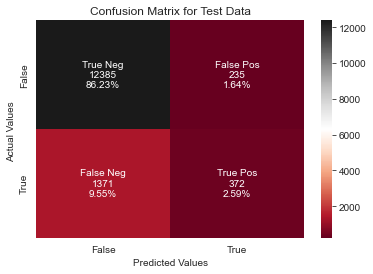

In [66]:
y_pred = ab_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Roc Curve

Roc Curve for Training

In [67]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = ab_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_ab_clf,true_positive_rate_ab_clf,threshold_ab_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.846045702095604

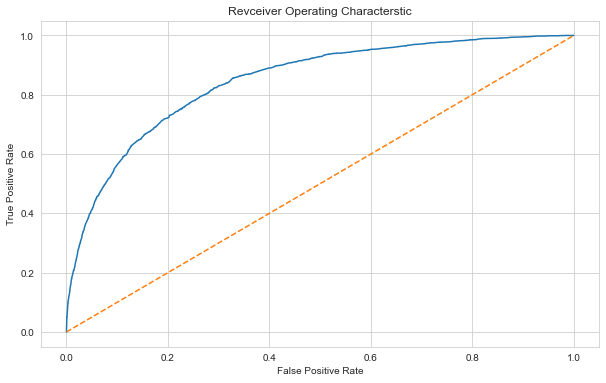

In [68]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_ab_clf,true_positive_rate_ab_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [69]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = ab_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_ab_clf,true_positive_rate_ab_clf,threshold_ab_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.8261366498368389

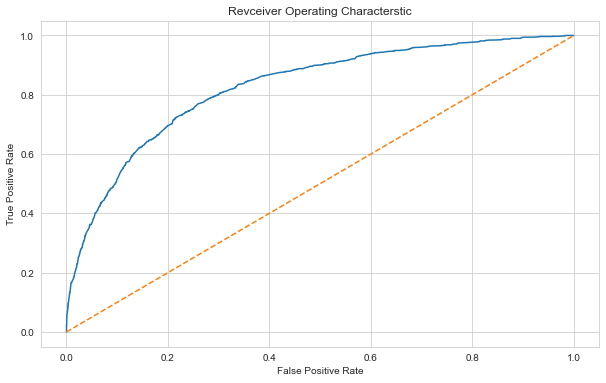

In [70]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_ab_clf,true_positive_rate_ab_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [71]:
test_score = accuracy_score(y_test, ab_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, ab_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["AdaBoostClassifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression,90.173962,89.946390
1,K-nearest neighbors,92.746099,91.784446
2,Support Vector Machine,91.588339,90.942004
3,LGBMClassifier,96.947453,93.894033
4,Decision Tree Classifier,90.711067,89.744482
5,Random Forest Classifier,89.204189,88.623547
6,XGBoost Classifier,99.892579,93.956694
7,AdaBoostClassifier,89.448871,88.818492


# 9. GradientBoostingClassifier

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier( min_samples_split=30, min_samples_leaf=10,)
gb_clf.fit(X_train, y_train)

print_score(gb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(gb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 92.81%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.927677     0.935020  0.928058      0.931348      0.928537
recall         0.996181     0.414373  0.928058      0.705277      0.928058
f1-score       0.960709     0.574254  0.928058      0.767482      0.915460
support    29589.000000  3924.000000  0.928058  33513.000000  33513.000000
_______________________________________________
Confusion Matrix: 
 [[29476   113]
 [ 2298  1626]]

Test Result:
Accuracy Score: 91.85%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.918862     0.912230  0.918541      0.915546      0.918057
recall         0.995166     0.363741  0.918541      0.679454      0.918541
f1-score       0.955493     0.520098  0.918541      0.737796      0.902656
support   

# Confusion Matrix

Confusion Matrix for Training

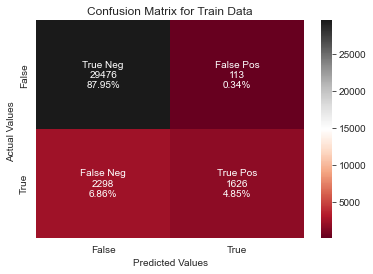

In [73]:
y_pred = gb_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

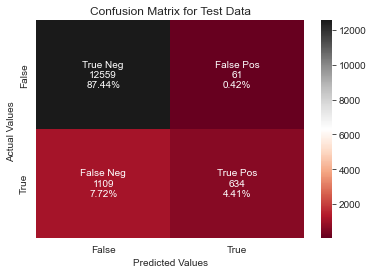

In [74]:
y_pred = gb_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Roc Curve

Roc Curve for Training

In [75]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = gb_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_gb_clf,true_positive_rate_gb_clf,threshold_gb_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.9343398287424567

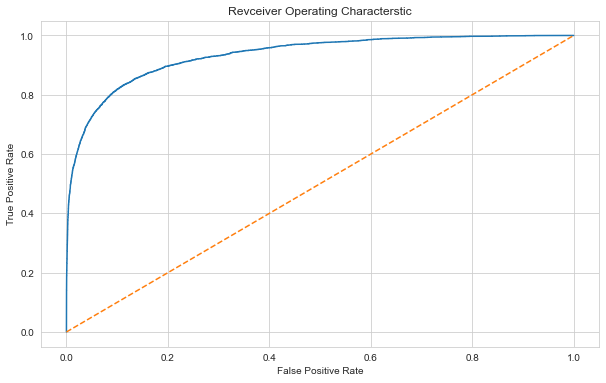

In [76]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_gb_clf, true_positive_rate_gb_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [77]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = gb_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_gb_clf,true_positive_rate_gb_clf,threshold_gb_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.9107983666611204

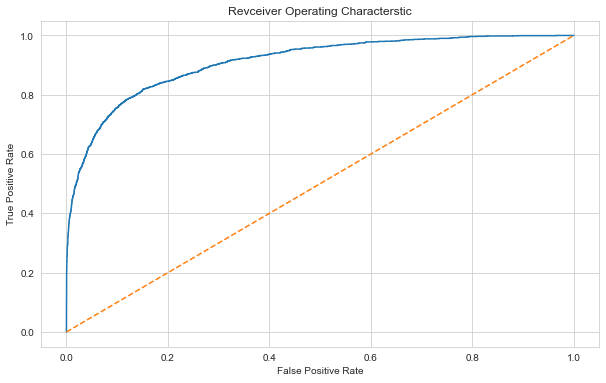

In [78]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_gb_clf, true_positive_rate_gb_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [79]:
test_score = accuracy_score(y_test, gb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, gb_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["GradientBoostingClassifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression,90.173962,89.946390
1,K-nearest neighbors,92.746099,91.784446
2,Support Vector Machine,91.588339,90.942004
3,LGBMClassifier,96.947453,93.894033
4,Decision Tree Classifier,90.711067,89.744482
5,Random Forest Classifier,89.204189,88.623547
6,XGBoost Classifier,99.892579,93.956694
7,AdaBoostClassifier,89.448871,88.818492
8,GradientBoostingClassifier,92.805777,91.854069


# 10. ExtraTreesClassifier

In [80]:
from sklearn.ensemble import ExtraTreesClassifier
etc_clf = ExtraTreesClassifier(n_estimators=100,max_depth=10)
etc_clf.fit(X_train, y_train)

print_score(etc_clf, X_train, y_train, X_test, y_test, train=True)
print_score(etc_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 89.87%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.897044     1.000000  0.898666      0.948522      0.909099
recall         1.000000     0.134557  0.898666      0.567278      0.898666
f1-score       0.945728     0.237197  0.898666      0.591463      0.862767
support    29589.000000  3924.000000  0.898666  33513.000000  33513.000000
_______________________________________________
Confusion Matrix: 
 [[29589     0]
 [ 3396   528]]

Test Result:
Accuracy Score: 89.01%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.889187     0.966102  0.890134      0.927644      0.898520
recall         0.999525     0.098107  0.890134      0.548816      0.890134
f1-score       0.941133     0.178125  0.890134      0.559629      0.848539
support   

# Confusion Matrix

Confusion Matrix for Training

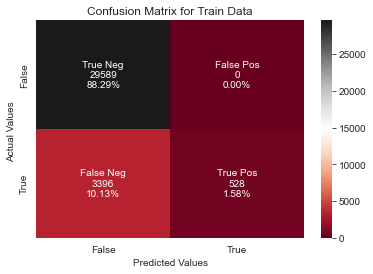

In [81]:
y_pred = etc_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

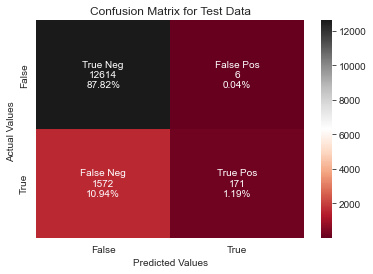

In [82]:
y_pred = etc_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Roc Curve

Roc Curve for Training

In [83]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = etc_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_etc_clf,true_positive_rate_etc_clf,threshold_etc_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.9410425806708549

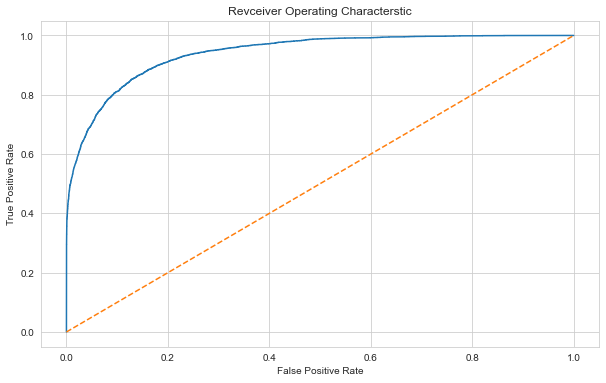

In [84]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_etc_clf,true_positive_rate_etc_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [85]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = etc_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_etc_clf,true_positive_rate_etc_clf,threshold_etc_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.8814068135798799

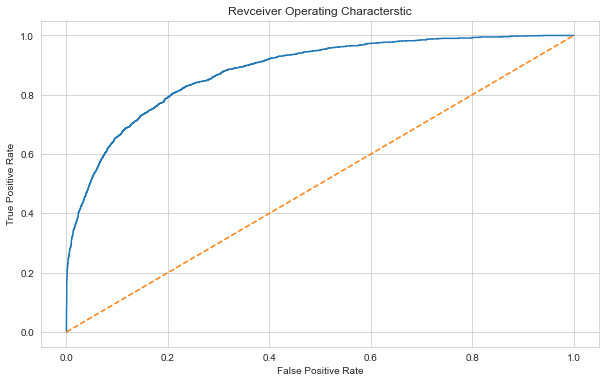

In [86]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_etc_clf,true_positive_rate_etc_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [87]:
test_score = accuracy_score(y_test, etc_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, etc_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["ExtraTreesClassifier", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression,90.173962,89.946390
1,K-nearest neighbors,92.746099,91.784446
2,Support Vector Machine,91.588339,90.942004
3,LGBMClassifier,96.947453,93.894033
4,Decision Tree Classifier,90.711067,89.744482
5,Random Forest Classifier,89.204189,88.623547
6,XGBoost Classifier,99.892579,93.956694
7,AdaBoostClassifier,89.448871,88.818492
8,GradientBoostingClassifier,92.805777,91.854069
9,ExtraTreesClassifier,89.866619,89.013437


# 11. CatBoostClassifier

In [88]:
from catboost import CatBoostClassifier
cbc_clf = CatBoostClassifier(n_estimators=10)
cbc_clf.fit(X_train, y_train)

print_score(cbc_clf, X_train, y_train, X_test, y_test, train=True)
print_score(cbc_clf, X_train, y_train, X_test, y_test, train=False)

Learning rate set to 0.5
0:	learn: 0.4005228	total: 193ms	remaining: 1.74s
1:	learn: 0.3161278	total: 251ms	remaining: 1s
2:	learn: 0.2897060	total: 283ms	remaining: 661ms
3:	learn: 0.2704765	total: 334ms	remaining: 501ms
4:	learn: 0.2558922	total: 371ms	remaining: 371ms
5:	learn: 0.2458539	total: 402ms	remaining: 268ms
6:	learn: 0.2387313	total: 432ms	remaining: 185ms
7:	learn: 0.2320386	total: 462ms	remaining: 116ms
8:	learn: 0.2244749	total: 491ms	remaining: 54.6ms
9:	learn: 0.2198858	total: 520ms	remaining: 0us
Train Result:
Accuracy Score: 91.71%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.920879     0.844257  0.917077      0.882568      0.911908
recall         0.991247     0.357798  0.917077      0.674522      0.917077
f1-score       0.954768     0.502595  0.917077      0.728682      0.901824
support    29589.000000  3924.000000  0.917077  33513.000000  33513.000

# Confusion Matrix

Confusion Matrix for Training

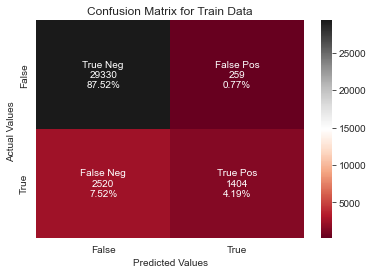

In [89]:
y_pred = cbc_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

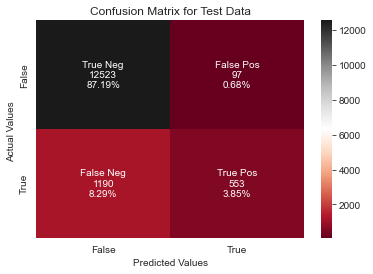

In [90]:
y_pred = cbc_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Roc Curve

Roc Curve for Training

In [91]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = cbc_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_cbc_clf,true_positive_rate_cbc_clf,threshold_cbc_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.9022930362410831

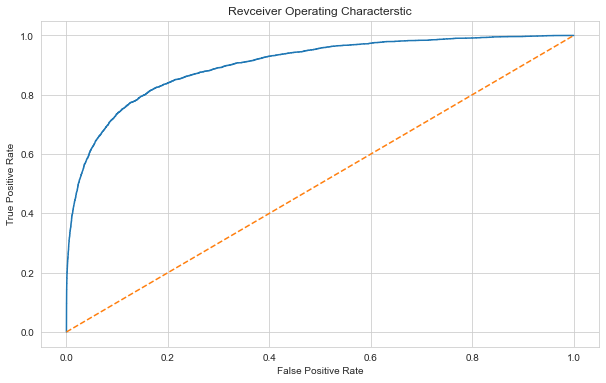

In [92]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_cbc_clf,true_positive_rate_cbc_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [93]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = cbc_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_cbc_clf,true_positive_rate_cbc_clf,threshold_cbc_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.8849384179234483

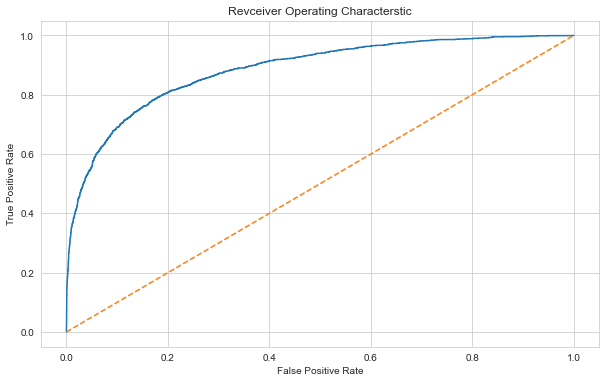

In [94]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_cbc_clf,true_positive_rate_cbc_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [95]:
test_score = accuracy_score(y_test, cbc_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, cbc_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["CatBoostClassifier", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression,90.173962,89.946390
1,K-nearest neighbors,92.746099,91.784446
2,Support Vector Machine,91.588339,90.942004
3,LGBMClassifier,96.947453,93.894033
4,Decision Tree Classifier,90.711067,89.744482
5,Random Forest Classifier,89.204189,88.623547
6,XGBoost Classifier,99.892579,93.956694
7,AdaBoostClassifier,89.448871,88.818492
8,GradientBoostingClassifier,92.805777,91.854069
9,ExtraTreesClassifier,89.866619,89.013437


# **Comparing ROC Curve of k-Nearest Neighbors, Logistic Regression and Decision Tree**

In [96]:
from sklearn.metrics import auc

auc_lr=auc(false_positive_rate_lr_clf,true_positive_rate_lr_clf)
auc_knn=auc(false_positive_rate_knn_clf,true_positive_rate_knn_clf)
auc_svm=auc(false_positive_rate_svm_clf,true_positive_rate_svm_clf)
auc_lgbmc=auc(false_positive_rate_lgbmc_clf,true_positive_rate_lgbmc_clf)
auc_tree=auc(false_positive_rate_tree_clf,true_positive_rate_tree_clf)
auc_rf=auc(false_positive_rate_rf_clf,true_positive_rate_rf_clf)
auc_xgb=auc(false_positive_rate_xgb_clf,true_positive_rate_xgb_clf)
auc_ab=auc(false_positive_rate_ab_clf,true_positive_rate_ab_clf)
auc_gb=auc(false_positive_rate_gb_clf,true_positive_rate_gb_clf)
auc_etc=auc(false_positive_rate_etc_clf,true_positive_rate_etc_clf)
auc_cbc=auc(false_positive_rate_cbc_clf,true_positive_rate_cbc_clf)

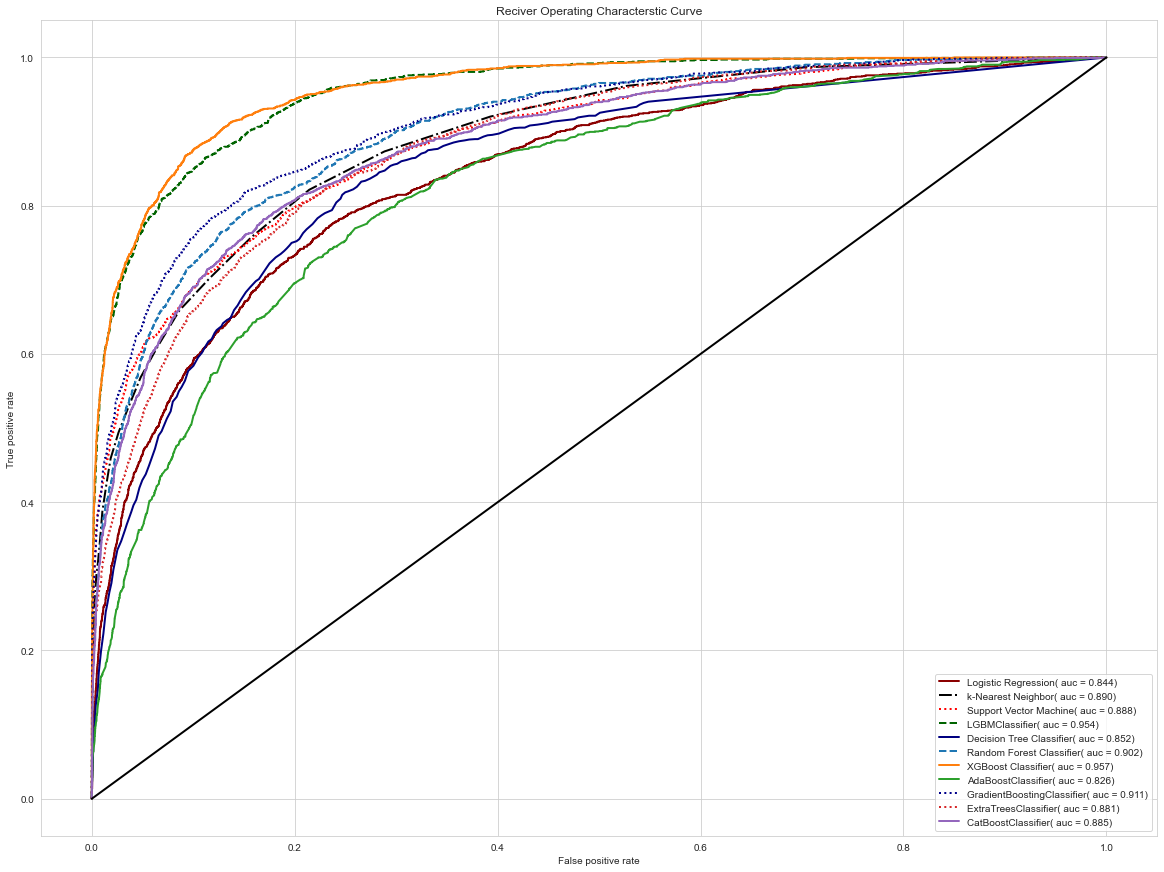

In [97]:
#Plot All ROC Curve`s

sns.set_style('whitegrid')
plt.figure(figsize=(20,15))
plt.title('Reciver Operating Characterstic Curve')

plt.plot(false_positive_rate_lr_clf,true_positive_rate_lr_clf,linewidth=2,color="darkred",linestyle='-',label='Logistic Regression( auc = %0.3f)' % auc_lr)
plt.plot(false_positive_rate_knn_clf,true_positive_rate_knn_clf,linewidth=2,color="black",linestyle='-.',label='k-Nearest Neighbor( auc = %0.3f)' % auc_knn)
plt.plot(false_positive_rate_svm_clf,true_positive_rate_svm_clf,linewidth=2,color="red",linestyle=':',label='Support Vector Machine( auc = %0.3f)' % auc_svm)
plt.plot(false_positive_rate_lgbmc_clf,true_positive_rate_lgbmc_clf,linewidth=2,color="darkgreen",linestyle='dashed',label='LGBMClassifier( auc = %0.3f)' % auc_lgbmc)
plt.plot(false_positive_rate_tree_clf,true_positive_rate_tree_clf,linewidth=2,color="navy",linestyle='solid',label='Decision Tree Classifier( auc = %0.3f)' % auc_tree)
plt.plot(false_positive_rate_rf_clf,true_positive_rate_rf_clf,linewidth=2,linestyle='--',label='Random Forest Classifier( auc = %0.3f)' % auc_rf)
plt.plot(false_positive_rate_xgb_clf,true_positive_rate_xgb_clf,linewidth=2,linestyle='-',label='XGBoost Classifier( auc = %0.3f)' % auc_xgb)
plt.plot(false_positive_rate_ab_clf,true_positive_rate_ab_clf,linewidth=2,linestyle='-',label='AdaBoostClassifier( auc = %0.3f)' % auc_ab)
plt.plot(false_positive_rate_gb_clf,true_positive_rate_gb_clf,linewidth=2,color="darkblue",linestyle='dotted',label='GradientBoostingClassifier( auc = %0.3f)' % auc_gb)
plt.plot(false_positive_rate_etc_clf,true_positive_rate_etc_clf,linewidth=2,linestyle=':',label='ExtraTreesClassifier( auc = %0.3f)' % auc_etc)
plt.plot(false_positive_rate_cbc_clf,true_positive_rate_cbc_clf,linewidth=2,linestyle='solid',label='CatBoostClassifier( auc = %0.3f)' % auc_cbc)

plt.plot([0,1],linewidth=2,color="black",linestyle='-')
#plt.plot([0,0],[1,0],c='.1')
#plt.plot([1,1],c='.1')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()